# Importing packages

In [1]:
import tensorflow as tf
import datetime
import os
import numpy as np
import pathlib
import pandas as pd
import requests
from io import BytesIO
import statistics
import random
from platform import platform
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow import keras
from tensorflow.keras import layers, Model, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B2
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import InputLayer, Softmax, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, RandomFlip, RandomRotation


# Prepearing data sets

In [2]:
# path usend on colab
#main_path = 'drive/Othercomputers/MacBook/Projekt_DL/dane'

# path used on local drive
main_path = '/Users/user/Documents/InfoShareAcademy/23.05.30_Sprint_04_DL/Projekt_DL/dane'

In [3]:
train = os.path.join(main_path,'train')
test = os.path.join(main_path,'test')
valid = os.path.join(main_path,'valid')

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train,
    labels='inferred',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    )

test_data = tf.keras.utils.image_dataset_from_directory(
    test,
    labels='inferred',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    )

val_data = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels='inferred',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    )

class_names = train_data.class_names
print(class_names)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'A

# Printing random bird pictures

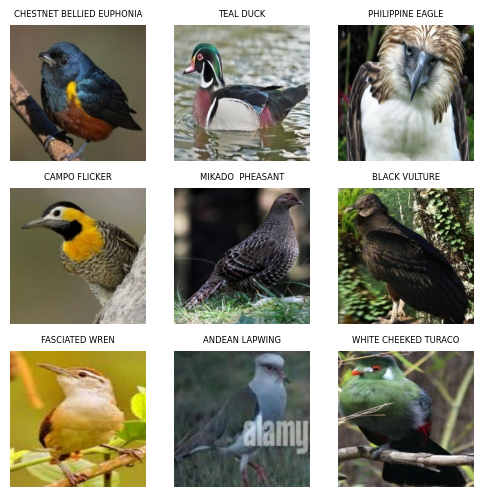

In [36]:
plt.figure(figsize=(6, 6))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]],fontsize=6)
    plt.axis("off")

# Prosty CNN - evluation

In [30]:
# Import model
model_imp_cnn = tf.keras.models.load_model(os.path.join(main_path,"model_CNN_kaggle_new.h5"))

In [31]:
model_imp_cnn.evaluate(test_data)

83/83 [==============================] - 498s 6s/step - loss: 1.7047 - accuracy: 0.5935


[1.7047419548034668, 0.5935238003730774]

In [32]:
model_imp_cnn.evaluate(val_data)

83/83 [==============================] - 493s 6s/step - loss: 1.8166 - accuracy: 0.5825


[1.8166121244430542, 0.5824761986732483]

1/1 [==============================] - 6s 6s/step


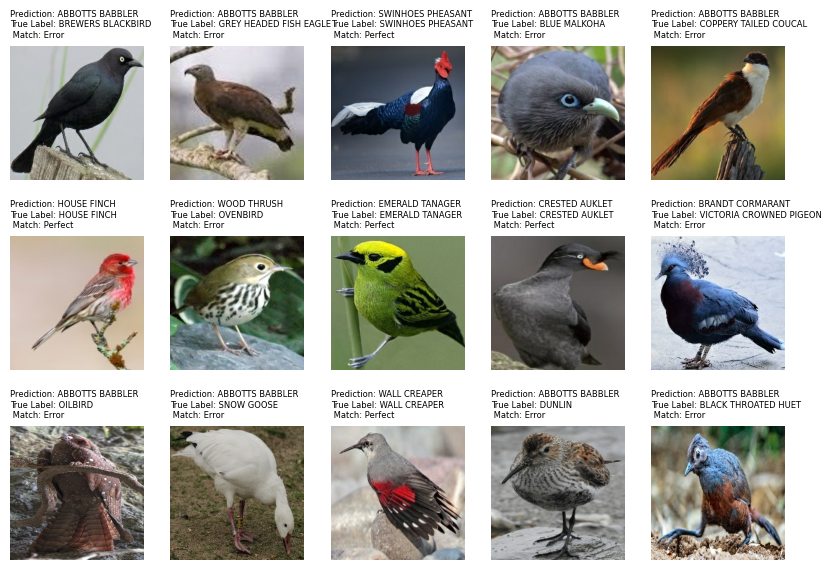

In [49]:
test_labels = test_data.class_names

plt.figure(figsize=(10, 7))

for image, label in test_data.take(1):
    model_prediction = model_imp_cnn.predict(image)
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(image[i].numpy().astype("int"))
        p = test_labels[tf.argmax(tf.round(model_prediction[i]))]
        t = test_labels[(label[i])]
        if p == t:
          m = "Perfect"
        else:
          m = "Error"
        plt.title(f"Prediction: {p}\nTrue Label: {t}\n Match: {m}", fontsize=6, loc='left')
        plt.grid(False)
        plt.axis("off")
    plt.show()

In [34]:
y_pred_c = []  # store predicted labels
y_true_c = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_data:   # use dataset.unbatch() with repeat
   # append true labels
   y_true_c.append(label_batch)
   # compute predictions
   preds_c = model_imp_efB0.predict(image_batch)
   # append predicted labels
   y_pred_c.append(np.argmax(preds_c, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels_c = tf.concat([item for item in y_true_c], axis = 0)
predicted_labels_c = tf.concat([item for item in y_pred_c], axis = 0)

1/1 [==============================] - 0s 263ms/step


In [35]:
report_cnn = classification_report(correct_labels, predicted_labels, target_names= class_names, output_dict=True)
df_cnn = pd.DataFrame(report_cnn).transpose()
df_cnn.to_csv(os.path.join(main_path,'class_report_cnn_kaggle.csv'))

# EfficientNet_B0 - evaluation

In [8]:
# Import model
model_imp_efB0 = tf.keras.models.load_model(os.path.join(main_path,"model_efn0_kagg_pre_a.h5"))

In [10]:
model_imp_efB0.evaluate(test_data)

83/83 [==============================] - 244s 3s/step - loss: 0.0759 - accuracy: 0.9783


[0.0758606567978859, 0.9782857298851013]

In [9]:
model_imp_efB0.evaluate(val_data)

83/83 [==============================] - 252s 3s/step - loss: 0.1904 - accuracy: 0.9627


[0.19038724899291992, 0.9626666903495789]

1/1 [==============================] - 3s 3s/step


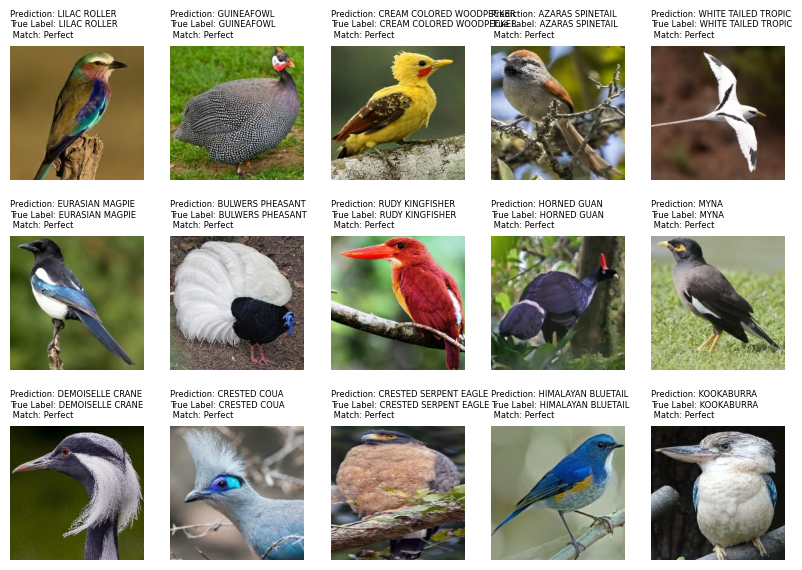

In [50]:
test_labels = test_data.class_names

plt.figure(figsize=(10, 7))

for image, label in test_data.take(1):
    model_prediction = model_imp_efB0.predict(image)
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(image[i].numpy().astype("int"))
        p = test_labels[tf.argmax(tf.round(model_prediction[i]))]
        t = test_labels[(label[i])]
        if p == t:
          m = "Perfect"
        else:
          m = "Error"
        plt.title(f"Prediction: {p}\nTrue Label: {t}\n Match: {m}", fontsize=6, loc='left')
        plt.grid(False)
        plt.axis("off")
    plt.show()

In [15]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_data:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model_imp_efB0.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 16s 16s/step


In [17]:
report_efb0 = classification_report(correct_labels, predicted_labels, target_names= class_names, output_dict=True)
df_efb0 = pd.DataFrame(report_efb0).transpose()
df_efb0.to_csv(os.path.join(main_path,'class_report_efB0_kaggle.csv'))

# EfficientNet_B2_v2 - evaluation

In [18]:
model_imp_efB2 = tf.keras.models.load_model(os.path.join(main_path,"model_efnB2_pre_a.h5"))

In [19]:
model_imp_efB2.evaluate(test_data)

83/83 [==============================] - 396s 5s/step - loss: 0.0539 - accuracy: 0.9832


[0.053890496492385864, 0.9832381010055542]

In [20]:
model_imp_efB2.evaluate(val_data)

83/83 [==============================] - 314s 4s/step - loss: 0.1207 - accuracy: 0.9688


[0.12071721255779266, 0.9687619209289551]

1/1 [==============================] - 4s 4s/step


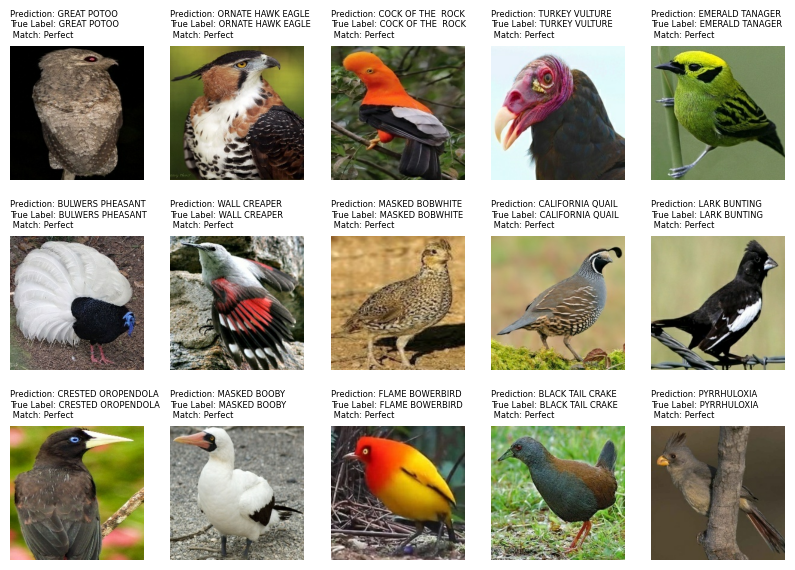

In [55]:
test_labels = test_data.class_names

plt.figure(figsize=(10, 7))

for image, label in test_data.take(1):
    model_prediction = model_imp_efB2.predict(image)
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(image[i].numpy().astype("int"))
        p = test_labels[tf.argmax(tf.round(model_prediction[i]))]
        t = test_labels[(label[i])]
        if p == t:
          m = "Perfect"
        else:
          m = "Error"
        plt.title(f"Prediction: {p}\nTrue Label: {t}\n Match: {m}", fontsize=6, loc='left')
        plt.grid(False)
        plt.axis("off")
    plt.show()

In [22]:
y_pred_2 = []  # store predicted labels
y_true_2 = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_data:   # use dataset.unbatch() with repeat
   # append true labels
   y_true_2.append(label_batch)
   # compute predictions
   preds_2 = model_imp_efB2.predict(image_batch)
   # append predicted labels
   y_pred_2.append(np.argmax(preds_2, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels_2 = tf.concat([item for item in y_true_2], axis = 0)
predicted_labels_2 = tf.concat([item for item in y_pred_2], axis = 0)

1/1 [==============================] - 5s 5s/step


In [23]:
report_efb2 = classification_report(correct_labels_2, predicted_labels_2, target_names= class_names, output_dict=True)
df_efb2 = pd.DataFrame(report_efb2).transpose()
df_efb2.to_csv(os.path.join(main_path,'class_report_efB2_kaggle.csv'))

# ResNet_50_v2 - evaluation

In [24]:
model_imp_res = tf.keras.models.load_model(os.path.join(main_path,"model_res50_kagg_pre_a.h5"))

In [25]:
model_imp_res.evaluate(test_data)

83/83 [==============================] - 679s 8s/step - loss: 0.1486 - accuracy: 0.9650


[0.14863361418247223, 0.9649524092674255]

In [26]:
model_imp_res.evaluate(val_data)

83/83 [==============================] - 787s 9s/step - loss: 0.2597 - accuracy: 0.9425


[0.2596800625324249, 0.942476212978363]

1/1 [==============================] - 9s 9s/step


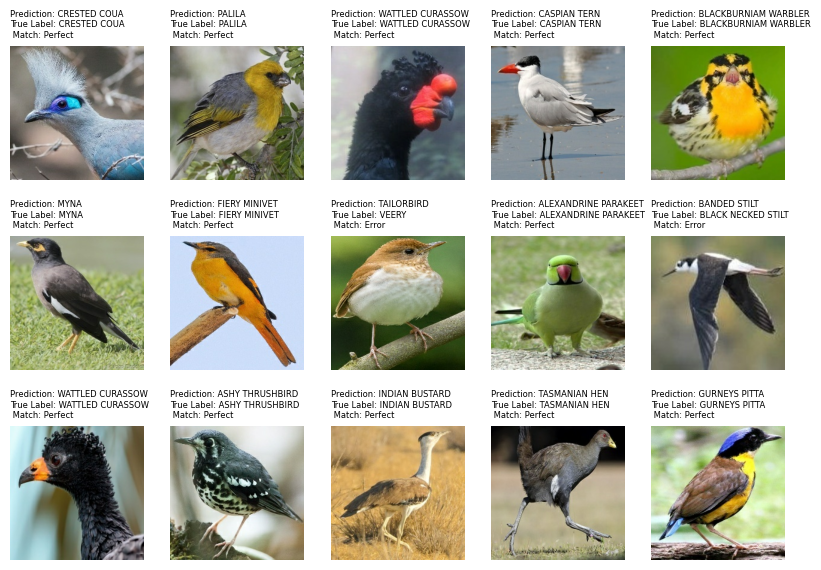

In [52]:
test_labels = test_data.class_names

plt.figure(figsize=(10, 7))

for image, label in test_data.take(1):
    model_prediction = model_imp_res.predict(image)
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(image[i].numpy().astype("int"))
        p = test_labels[tf.argmax(tf.round(model_prediction[i]))]
        t = test_labels[(label[i])]
        if p == t:
          m = "Perfect"
        else:
          m = "Error"
        plt.title(f"Prediction: {p}\nTrue Label: {t}\n Match: {m}", fontsize=6, loc='left')
        plt.grid(False)
        plt.axis("off")
    plt.show()

In [28]:
y_pred_5 = []  # store predicted labels
y_true_5 = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_data:   # use dataset.unbatch() with repeat
   # append true labels
   y_true_5.append(label_batch)
   # compute predictions
   preds_5 = model_imp_res.predict(image_batch)
   # append predicted labels
   y_pred_5.append(np.argmax(preds_5, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels_5 = tf.concat([item for item in y_true_5], axis = 0)
predicted_labels_5 = tf.concat([item for item in y_pred_5], axis = 0)

1/1 [==============================] - 2s 2s/step


In [29]:
report_res = classification_report(correct_labels_5, predicted_labels_5, target_names= class_names, output_dict=True)
df_res = pd.DataFrame(report_res).transpose()
df_res.to_csv(os.path.join(main_path,'class_report_res50_kaggle.csv'))